# EDA

### 1. Data Cleaning & Preprocessing

##### Check for missing values / null values 

In [7]:
df_new.isnull().sum()  # Count of missing values per column

Month_Date                0
Opening Price             0
Highest Price             0
Lowest Price              0
Closing Price             0
Adjusted Closing Price    0
Trading Volume            0
Dividend per Share        0
dtype: int64

In [8]:
df_new.dropna(inplace=True)  # Remove rows with null values

##### Check for duplicates

In [9]:
df_new.duplicated().sum()  # Number of duplicate rows

0

In [10]:
df_new.drop_duplicates(inplace=True)  # Remove duplicates

##### Convert data necessarily

In [11]:
# Convert 'Month_Date' to datetime format
df_new["Month_Date"] = pd.to_datetime(df_new["Month_Date"])

# Set it as the index
df_new.set_index("Month_Date", inplace=True)

df_new.head()  


,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing Price,Trading Volume,Dividend per Share
Month_Date,,,,,,,
2025-03-10,254.735,266.45,245.1823,256.90,256.9000,30410394,0.00
2025-02-28,252.400,265.72,246.5400,252.44,252.4400,94123851,1.67
2025-01-31,221.820,261.80,214.6100,255.70,253.9983,92424171,0.00
2024-12-31,227.500,239.35,217.6523,219.83,218.3670,81535689,0.00
2024-11-29,207.770,230.36,204.0700,227.41,225.8966,77280587,1.67


##### Outlier Detection

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Calculate Z-scores for all numerical columns in the dataset
z_scores = df_new.apply(zscore)

# Identify outliers: Z-scores greater than 3 or less than -3
outliers = (np.abs(z_scores) > 3)

# Get the rows with outliers
outlier_rows = df_new[outliers.any(axis=1)]

#  outlier rows
print("Outlier rows:")
print(outlier_rows)

# exact number of outliers in each column
outlier_counts = outliers.sum()
print("\nNumber of outliers in each column:")
print(outlier_counts)


Outlier rows:
            Opening Price  Highest Price  Lowest Price  Closing Price  \
Month_Date                                                              
2025-03-10        254.735         266.45      245.1823         256.90   
2025-02-28        252.400         265.72      246.5400         252.44   
2025-01-31        221.820         261.80      214.6100         255.70   
2024-12-31        227.500         239.35      217.6523         219.83   
2021-01-29        125.850         132.24      117.3600         119.11   
2020-03-31        130.750         136.10       90.5600         110.93   
2018-10-31        151.710         154.36      114.0900         115.43   

            Adjusted Closing Price  Trading Volume  Dividend per Share  
Month_Date                                                              
2025-03-10                256.9000        30410394                0.00  
2025-02-28                252.4400        94123851                1.67  
2025-01-31                253.9983  

Since the outliers span a period of 7 months, beginning from December 2015, and reflect real-world market behavior, 
they will not be removed. These outliers capture significant market events and fluctuations, 
which are important for understanding and forecasting stock price movements. 
Removing them would risk losing valuable insights into how the market reacts during extreme conditions.

### 2. Descriptive statistics and visualizations to uncover patterns or anomalies and key insights from the data.

In [13]:
df_new.info()## Displays the data types, non-null counts, and memory usage of each column.
## Check for missing values and data types.
df_new.describe()## Provides statistical summary of numerical columns.
## Understand the distribution and spread of stock prices and trading volume.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2025-03-10 to 2015-01-30
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Opening Price           123 non-null    float64
 1   Highest Price           123 non-null    float64
 2   Lowest Price            123 non-null    float64
 3   Closing Price           123 non-null    float64
 4   Adjusted Closing Price  123 non-null    float64
 5   Trading Volume          123 non-null    int64  
 6   Dividend per Share      123 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 7.7 KB


,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing Price,Trading Volume,Dividend per Share
count,123.000000,123.000000,123.000000,123.000000,123.000000,1.230000e+02,123.000000
mean,148.741748,156.823375,141.829901,149.398211,118.170020,9.667108e+07,0.517561
std,26.022184,28.174058,26.135593,27.736908,36.240527,2.571302e+07,0.739258
min,106.360000,124.350000,90.560000,110.930000,79.421800,3.041039e+07,0.000000
25%,133.210000,139.404500,125.020000,132.735000,98.730900,7.922860e+07,0.000000
50%,144.250000,148.740000,137.330000,143.740000,106.084600,9.286479e+07,0.000000
75%,158.365000,164.395000,151.245000,158.865000,119.624950,1.071142e+08,1.500000
max,254.735000,266.450000,246.540000,256.900000,256.900000,1.980938e+08,1.670000


1. Line Plot for Stock Prices Over Time (Opening, Closing, Adjusted Closing Prices)

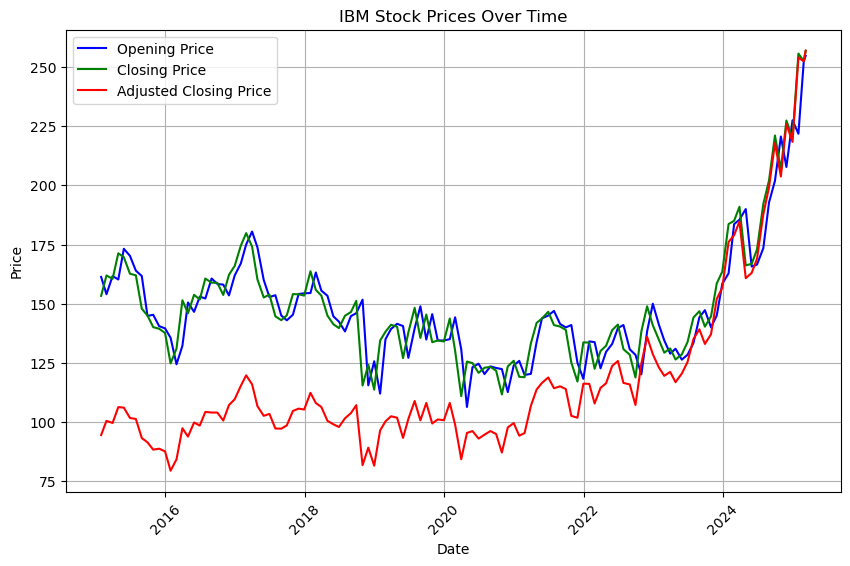

In [14]:
import matplotlib.pyplot as plt

# Line plot for Opening, Closing, and Adjusted Closing Prices over time
plt.figure(figsize=(10, 6))
plt.plot(df_new.index, df_new['Opening Price'], label='Opening Price', color='blue')
plt.plot(df_new.index, df_new['Closing Price'], label='Closing Price', color='green')
plt.plot(df_new.index, df_new['Adjusted Closing Price'], label='Adjusted Closing Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('IBM Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


2. Stock Highs and Lows Plot Over Time

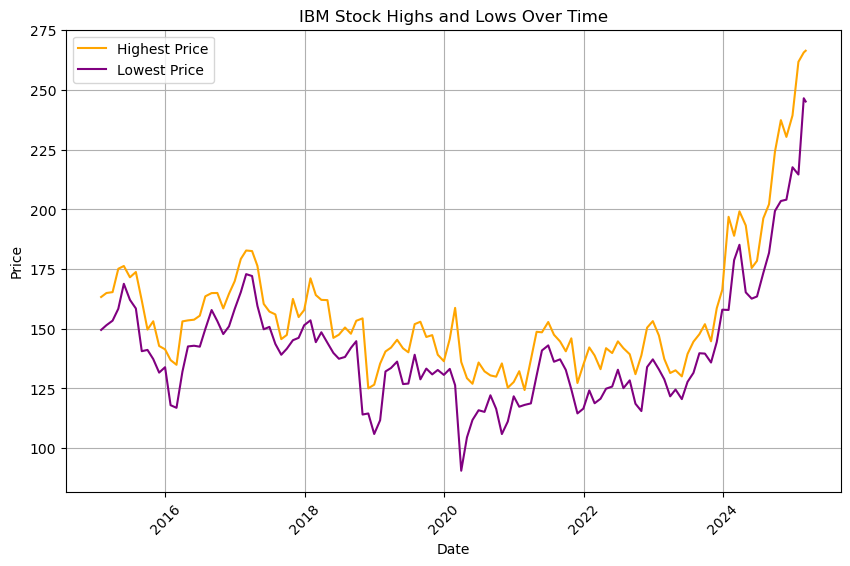

In [15]:
# Plotting High and Low prices
plt.figure(figsize=(10, 6))
plt.plot(df_new.index, df_new['Highest Price'], label='Highest Price', color='orange')
plt.plot(df_new.index, df_new['Lowest Price'], label='Lowest Price', color='purple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('IBM Stock Highs and Lows Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


3. Trading Volume Trend

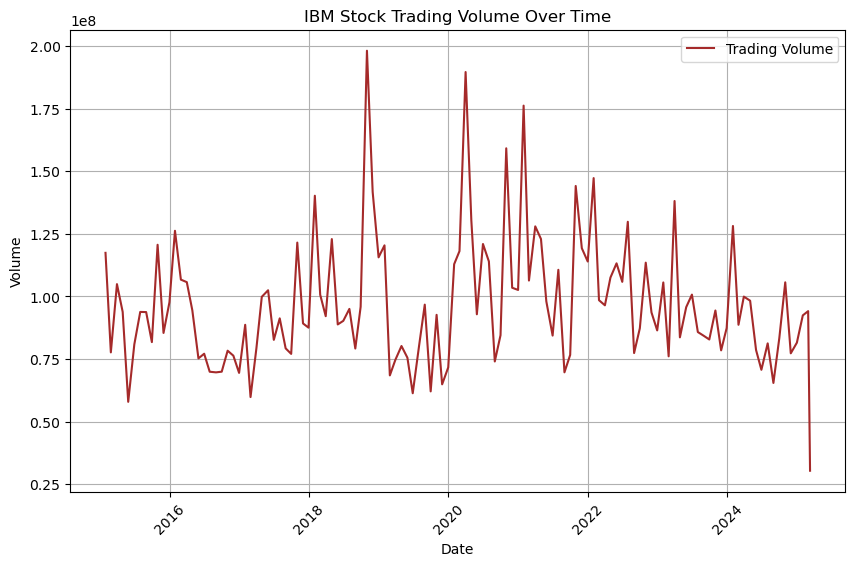

In [16]:
# Plotting trading volume
plt.figure(figsize=(10, 6))
plt.plot(df_new.index, df_new['Trading Volume'], label='Trading Volume', color='brown')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('IBM Stock Trading Volume Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


4. Histogram of Stock Prices (Distribution)

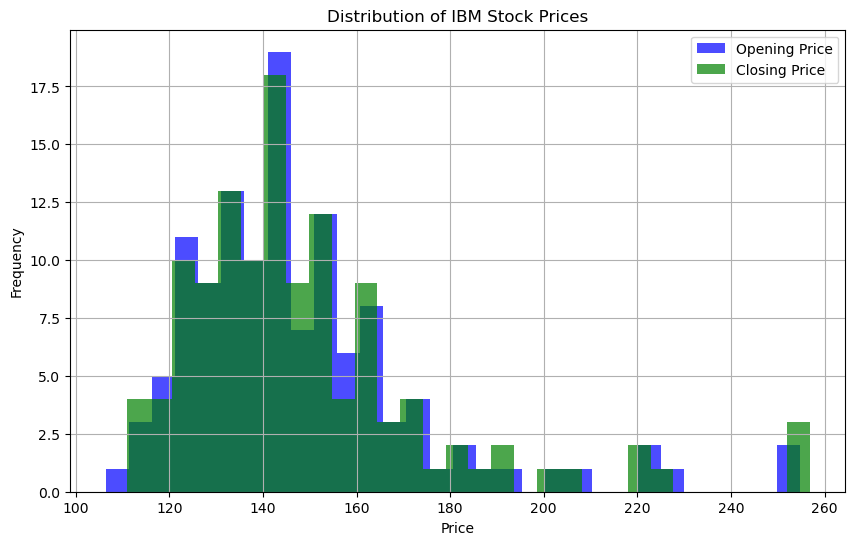

In [17]:
# Histogram for Opening Price
plt.figure(figsize=(10, 6))
plt.hist(df_new['Opening Price'], bins=30, color='blue', alpha=0.7, label='Opening Price')
plt.hist(df_new['Closing Price'], bins=30, color='green', alpha=0.7, label='Closing Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of IBM Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


5. Correlation Heatmap

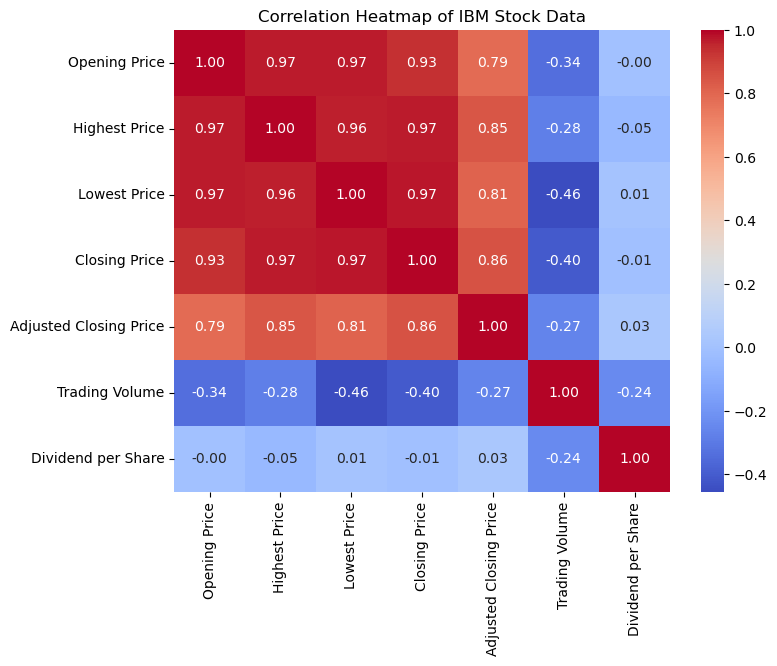

In [18]:
import seaborn as sns

# Correlation heatmap
correlation_matrix = df_new[['Opening Price', 'Highest Price', 'Lowest Price', 'Closing Price', 
                             'Adjusted Closing Price', 'Trading Volume', 'Dividend per Share']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of IBM Stock Data')
plt.show()


6. Rolling Standard Deviation for Volatility

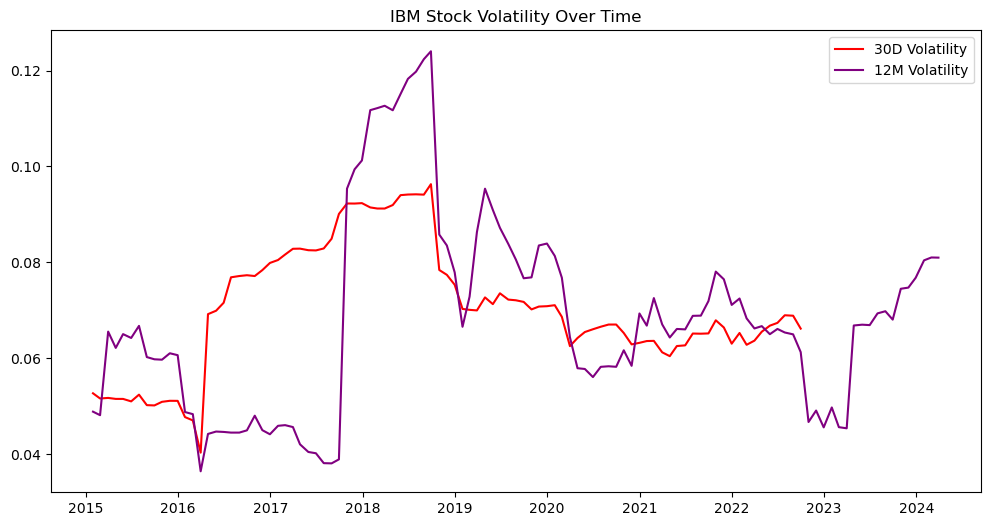

In [19]:
# Compute rolling volatility
df_new["Volatility_30D"] = df_new["Closing Price"].pct_change().rolling(30).std()
df_new["Volatility_12M"] = df_new["Closing Price"].pct_change().rolling(12).std()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_new.index, df_new["Volatility_30D"], 'r', label="30D Volatility")
plt.plot(df_new.index, df_new["Volatility_12M"], 'purple', label="12M Volatility")
plt.title("IBM Stock Volatility Over Time")
plt.legend()
plt.show()


7. Monthly Percentage Change in Stock Price

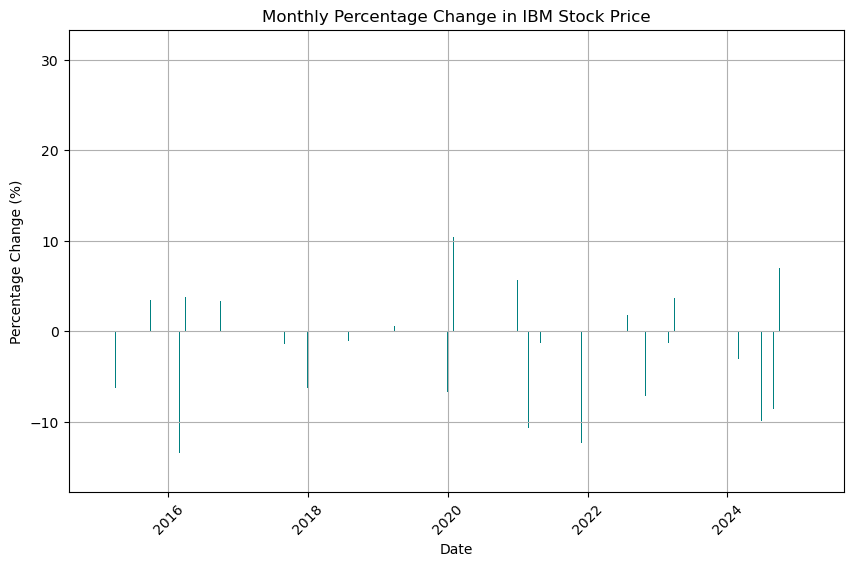

In [20]:
# Calculate monthly percentage change
df_new['Monthly Change'] = df_new['Closing Price'].pct_change() * 100

plt.figure(figsize=(10, 6))
plt.bar(df_new.index, df_new['Monthly Change'], color='teal')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.title('Monthly Percentage Change in IBM Stock Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
